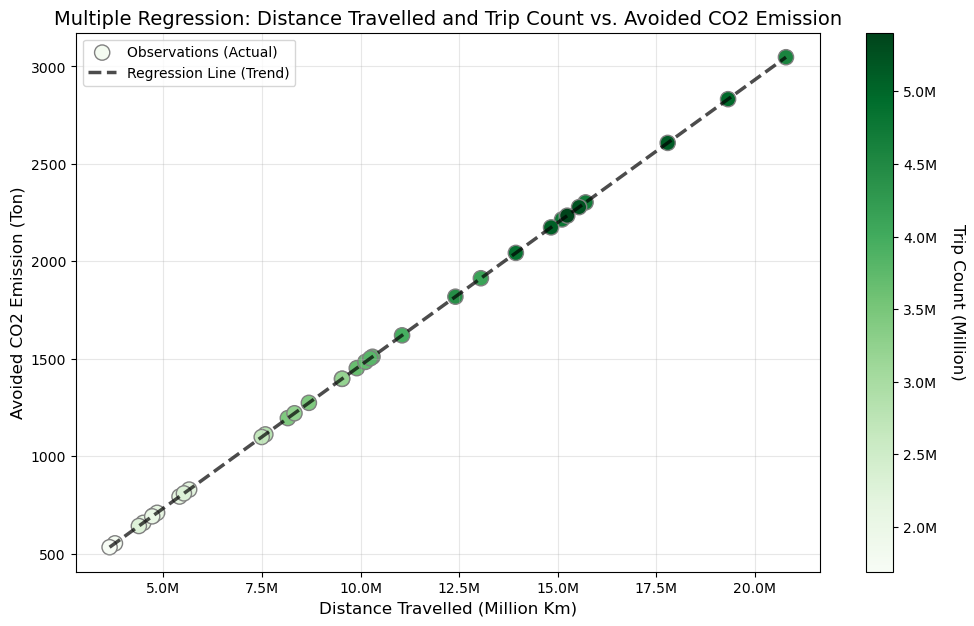

In [47]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 1. VERİYİ YÜKLE
df = pd.read_excel('RegressionData.xlsx')


# 2. MODELİ KUR VE TAHMİNLERİ AL
formula = 'avoided_CO2_emission_tons ~ distance_travelled_km + trip_number'
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
df['predicted_CO2'] = res.predict(df)
df_sorted = df.sort_values(by='distance_travelled_km')

# 3. FORMATLAYICI FONKSİYON (M = Milyon, K = Bin)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'
    else:
        return f'{x:.0f}'

formatter = ticker.FuncFormatter(currency_formatter)

# 4. GRAFİĞİ ÇİZ
plt.figure(figsize=(12, 7))

# A) Noktalar (Gözlemler)
scatter = plt.scatter(
    df['distance_travelled_km'], 
    df['avoided_CO2_emission_tons'], 
    c=df['trip_number'], 
    cmap='Greens',   # <-- Renk paletini buradan değiştir
    s=120,             # Nokta boyutu
    alpha=1,         # Şeffaflık (1 = Tam opak)
    edgecolor='gray',  # Kenar çizgisi
    label='Observations (Actual)'
)

# B) Renk Çubuğu (Colorbar)
cbar = plt.colorbar(scatter)
cbar.set_label('Trip Count (Million)', rotation=270, labelpad=20, fontsize=12)
cbar.ax.yaxis.set_major_formatter(formatter) # Milyon formatını uygula

# C) Regresyon Çizgisi
plt.plot(
    df_sorted['distance_travelled_km'], 
    df_sorted['predicted_CO2'], 
    color='black', linestyle='--', linewidth=2.5, alpha=0.7, label='Regression Line (Trend)'
)

# D) Eksen Formatları
plt.gca().xaxis.set_major_formatter(formatter) # X eksenini Milyon yap

# E) Başlıklar
plt.xlabel('Distance Travelled (Million Km)', fontsize=12)
plt.ylabel('Avoided CO2 Emission (Ton)', fontsize=12)
plt.title('Multiple Regression: Distance Travelled and Trip Count vs. Avoided CO2 Emission' , fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# Kaydet ve Göster
plt.savefig('regression.png', dpi=300, bbox_inches='tight')
plt.show()